<a href="https://colab.research.google.com/github/sourabhpatange11/Digit-Recognizer/blob/main/MINST_Digit_Classification_using_Deeep_Learning(Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dependencies**

In [1]:


import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow
tensorflow.random.set_seed(3)
import keras
from tensorflow.math import confusion_matrix

Loading MNIST data from keras.dataset

In [2]:
from keras.datasets import mnist


In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
type(X_train),type(X_test)

(numpy.ndarray, numpy.ndarray)

In [5]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

training data=60000 images

testing data= 10000 images

In [6]:
#image dimension= 28 * 28

# Grayscale image = 1 Channel

In [7]:
#printing 10th image

(X_train[10])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
X_train[10].shape

(28, 28)

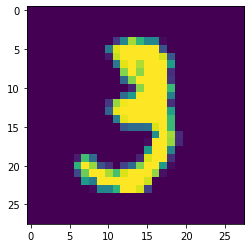

3


In [9]:
#Displaying image

plt.imshow(X_train[10])
plt.show()

#printing corresponding label

print(y_train[10])


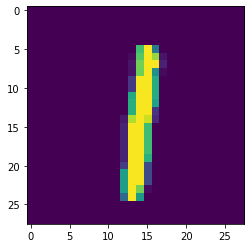

1


In [10]:
#Displaying image
plt.imshow(X_train[40])
plt.show()

#print corresponding label

print(y_train[40])

In [11]:
#image label
y_train.shape,y_test.shape

((60000,), (10000,))

In [12]:
#unique values in y train

print(np.unique(y_train))

#unique values in y test 

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [13]:
#We can this labels as such  or we can also apply one hot encoding

In [14]:
#All the images have same diamesions in this dataset, if not we have to resize all images to common dimmensions


In [15]:
#Scaling the values  (also called as normalization)

X_train=X_train/255
X_test=X_test/255



In [16]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [17]:
#Building neural network

In [18]:
#Setting layers of neural network

from keras.models import Sequential
from keras.layers import Dense,Flatten

In [19]:
model=Sequential([keras.layers.Flatten(input_shape=(28,28)),
                  keras.layers.Dense(50,activation='relu'),
                  keras.layers.Dense(50,activation='relu'),
                  keras.layers.Dense(10,activation='sigmoid')
                   
])

In [20]:
# model= Sequential()

# model.add(Dense(50,activation='relu'))

# model.add(Dense(50,activation='relu'))

# model.add(Dense(10,activation='softmax'))

In [21]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f3cb5ca3150>>

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
#training neural network
hist=model.fit(X_train,y_train,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0

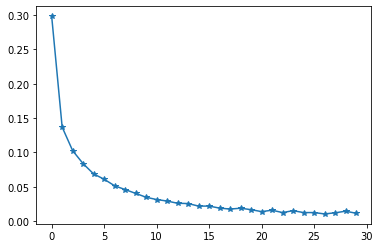

In [24]:
plt.plot(hist.history['loss'],marker='*')
plt.show()

In [25]:
#training data accuracy=98.90%

In [26]:
#Accuracy on test data

In [27]:

loss,accuracy=model.evaluate(X_test,y_test)
print('Loss is ',loss)
print('Accuracy on test data',accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1713 - accuracy: 0.9716
Loss is  0.17134854197502136
Accuracy on test data 0.9715999960899353


In [28]:
# Total Accuracy = 97.10%

In [29]:
X_test.shape

(10000, 28, 28)

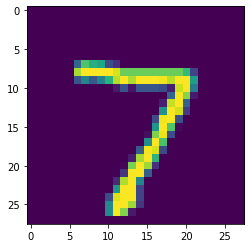

7


In [30]:
#first data point in X_test

plt.imshow(X_test[0])
plt.show()

#printing corresponding label
print(y_test[0])

In [31]:
y_pred=model.predict(X_test)

In [32]:
y_pred.shape

(10000, 10)

In [33]:
y_pred[0]

array([2.9367184e-05, 9.6092749e-01, 9.6699595e-04, 7.8609747e-01,
       1.6430066e-09, 8.0696122e-07, 2.4281805e-15, 1.0000000e+00,
       3.8819081e-08, 7.8841883e-01], dtype=float32)

In [34]:
# model.predict( ) gives the prediction probability of each class for that data point



In [35]:
#converting the prediction probabilities to class label

label_for_first_test_image=np.argmax(y_pred[0])
label_for_first_test_image

7

In [36]:
#converting the prediction probabilities to class label for all test data points

y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 0,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 9,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 5,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [37]:
y_pred

array([[2.9367184e-05, 9.6092749e-01, 9.6699595e-04, ..., 1.0000000e+00,
        3.8819081e-08, 7.8841883e-01],
       [1.3541743e-08, 9.8607910e-01, 1.0000000e+00, ..., 2.2672351e-16,
        9.9620783e-01, 4.2003173e-18],
       [8.5684869e-06, 9.9993479e-01, 7.6025426e-05, ..., 1.2173116e-02,
        7.2823399e-01, 1.0041905e-06],
       ...,
       [1.8030567e-11, 2.8080101e-12, 6.8268985e-10, ..., 5.4507669e-05,
        1.3534921e-05, 4.2972821e-01],
       [1.3090543e-10, 2.2247271e-09, 4.1168928e-04, ..., 4.0754676e-04,
        9.9221826e-01, 1.8385035e-07],
       [3.3145444e-08, 1.2087595e-05, 7.1464927e-07, ..., 6.2910323e-14,
        7.4490597e-10, 1.7028059e-20]], dtype=float32)

In [38]:
# y_test ---> True labels

# y_pred_labels ---> Predicted labels

In [39]:
#Confusion matrix

cm=confusion_matrix(y_test,y_pred_labels)

In [40]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    0,    0,    0,    1,    1,    1,    2,    2],
       [   0, 1120,    0,    3,    0,    2,    2,    1,    6,    1],
       [   3,    5, 1001,    6,    3,    0,    1,    5,    7,    1],
       [   0,    0,    6,  980,    1,    5,    0,    4,    4,   10],
       [   3,    0,    5,    0,  957,    0,    6,    3,    1,    7],
       [   3,    0,    0,   33,    3,  843,    3,    0,    4,    3],
       [  11,    3,    1,    1,    3,    9,  925,    0,    5,    0],
       [   1,    4,   11,   11,    4,    0,    1,  977,    3,   16],
       [   7,    1,    1,    9,    5,   11,    4,    1,  934,    1],
       [   2,    2,    1,    9,   24,    5,    1,    3,    5,  957]],
      dtype=int32)>

Text(0.5, 42.0, 'Predictes Labels')

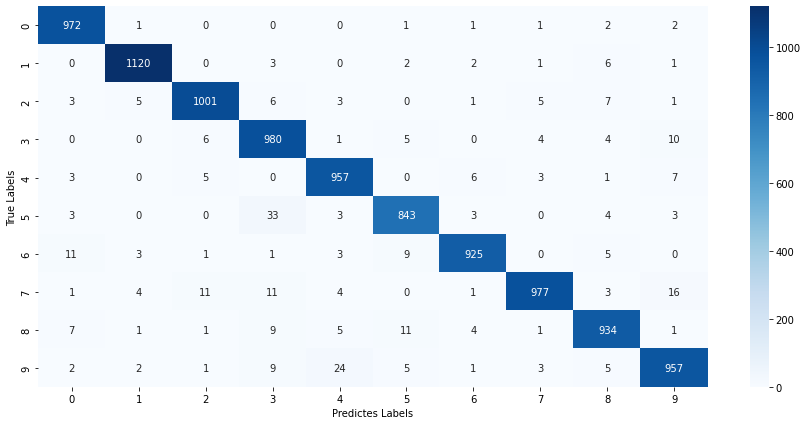

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predictes Labels')

In [42]:
#build predictive model
input_image_path='/3.png'

input_img = cv2.imread(input_image_path)


In [43]:
type(input_img)

numpy.ndarray

In [44]:
print(input_img)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[19 19 19]
  [19 19 19]
  [51 51 51]
  ...
  [51 51 51]
  [51 51 51]
  [19 19 19]]]


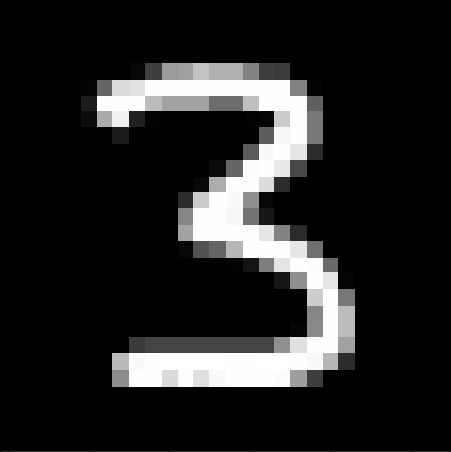

In [45]:
cv2_imshow(input_img)

In [46]:
input_img.shape

(452, 451, 3)

In [47]:
#conerting image into gray scale and  resize it

grayscale=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

In [48]:
grayscale.shape

(452, 451)

In [49]:
input_img_resized= cv2.resize(grayscale,(28,28))

In [50]:
input_img_resized.shape

(28, 28)

In [51]:
cv2_imshow(input_img_resized)

In [52]:
input_img_resized=input_img_resized/255

In [53]:
img_reshape=np.reshape(input_img_resized,[1,28,28])

In [54]:
input_pred=model.predict(img_reshape)
input_pred

array([[6.4368052e-18, 2.8180992e-05, 1.5480045e-06, 1.0000000e+00,
        3.8292822e-07, 9.6467396e-05, 1.8344321e-23, 1.0197943e-13,
        9.9933732e-01, 2.8114069e-05]], dtype=float32)

In [55]:
input_pred_label=np.argmax(input_pred)

In [56]:
input_pred_label

3

Path of the image to be predicted :/3.png


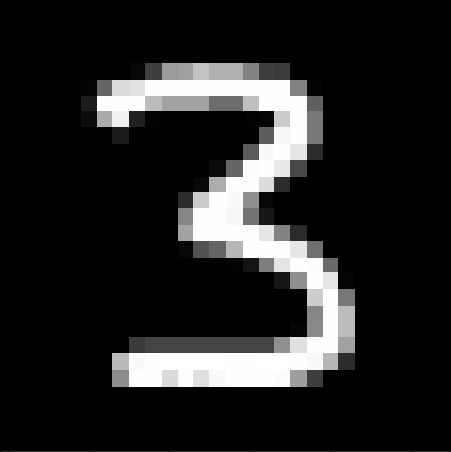

The Handwritten Digit is recognized as  3


In [57]:
#Predective System

input_image_path=input('Path of the image to be predicted :')

input_img = cv2.imread(input_image_path)

cv2_imshow(input_img)

grayscale=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

input_img_resized= cv2.resize(grayscale,(28,28))

input_img_resized/255

img_reshape=np.reshape(input_img_resized,[1,28,28])

input_pred=model.predict(img_reshape)

input_pred_label=np.argmax(input_pred)

print('The Handwritten Digit is recognized as ',input_pred_label)
